## Working with Tensorflow
In this assignment, you will be familiarized with the usage of the tensorflow library and how to build a model for the MNIST database in two ways
*   using the inbuilt layers in tensorflow
*   using custom layers to replicate the same result



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## Loading and preprocessing the Data
We will directly be using the dataset included in tensorflow library
A detailed description of data is given at (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Heres how the data looks

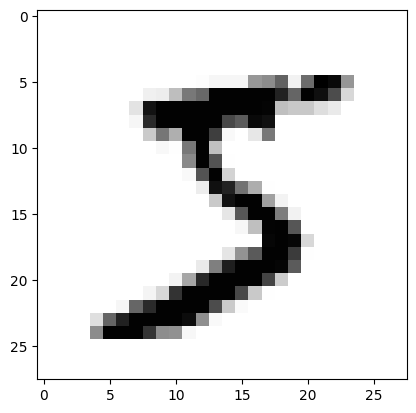

In [ ]:
plt.imshow(x_train[0],cmap= 'Greys')

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

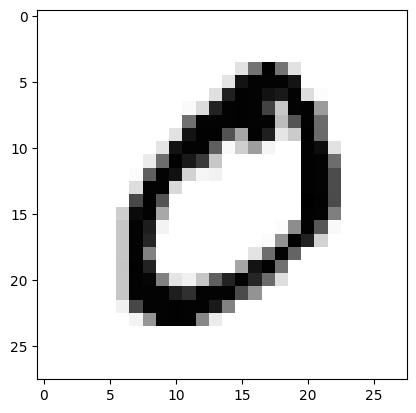

In [ ]:
plt.imshow(x_train[1],cmap= 'Greys')

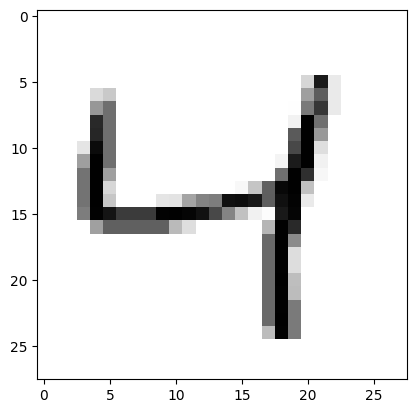

In [ ]:
plt.imshow(x_train[2],cmap= 'Greys')

# Making a simple feedforward network
As you have seen in the second week a simple feedfordward network works well to solve MNIST.<br/>
The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [ ]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8597 - loss: 0.4856 - val_accuracy: 0.9570 - val_loss: 0.1540
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9614 - loss: 0.1331 - val_accuracy: 0.9659 - val_loss: 0.1186
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0851 - val_accuracy: 0.9696 - val_loss: 0.1065
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9806 - loss: 0.0657 - val_accuracy: 0.9721 - val_loss: 0.0950
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9865 - loss: 0.0477 - val_accuracy: 0.9743 - val_loss: 0.0844
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9721 - loss: 0.0874
Test accuracy: 0.9757999777793884


## Making Custom Layers
You can go through this
<a href = 'https://www.tensorflow.org/tutorials/customization/custom_layers'> documentation </a> to get a feel for how to implement a custom layer

* Create a CustomDenseLayer with a Relu Activation
* Create a CustomDenseLayer with a Softmax Activation
* Create a CustomFlatten Layer

Altough we have provided solutions in the Next Cell Try to figure this out on your own.


In [ ]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        #TODO
        self.units=units

    def build(self, input_shape):
        #TODO
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units), initializer='zeros',trainable=True)

    def call(self, inputs):
        #TODO
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.relu(z)
        return z

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        #TODO
        self.units=units

    def build(self, input_shape):
        #TODO
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        #TODO
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.softmax(z)
        return z

class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        #TODO
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))

In [ ]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.relu(z)
        return z

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.softmax(z)
        return z

class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))



## Using out custom layers to Build a model for MNIST

In [ ]:
# Example usage of the custom dense layer
model = Sequential([
    CustomFlattenLayer(),
    CustomDenseReluLayer(128),
    CustomDenseSoftmaxLayer(10)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8473 - loss: 0.5639 - val_accuracy: 0.9533 - val_loss: 0.1676
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9561 - loss: 0.1523 - val_accuracy: 0.9670 - val_loss: 0.1149
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9708 - loss: 0.0985 - val_accuracy: 0.9645 - val_loss: 0.1101
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9801 - loss: 0.0684 - val_accuracy: 0.9717 - val_loss: 0.0917
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9844 - loss: 0.0510 - val_accuracy: 0.9721 - val_loss: 0.0927
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0961
Test accuracy: 0.9749000072479248


# Assignment
* Load and preprocess Boston housing dataset
* build a Linear Regression model for it and optimize it using tensorflow (its basically a neural network with a single neuron and no activaton)
* build a Feedforward network for it you can expirement around with no of layers and and neurons in each layer and different activation functions <br/>





In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import boston_housing

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [ ]:
#Preprocessing by standard normalizing
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [ ]:
linear_model = models.Sequential([
    layers.Dense(1, input_shape=(x_train.shape[1],), activation=None)
])

linear_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

linear_history = linear_model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

test_loss, test_mae = linear_model.evaluate(x_test, y_test)
print(f"Linear Regression Test Loss: {test_loss}, Test Mean Absolute Error: {test_mae}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.4505 - mae: 1.5708 - val_loss: 5.5819 - val_mae: 1.7481
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3270 - mae: 1.5837 - val_loss: 5.3479 - val_mae: 1.7064
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0248 - mae: 1.5056 - val_loss: 5.1388 - val_mae: 1.6674
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7903 - mae: 1.4908 - val_loss: 4.9479 - val_mae: 1.6293
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8730 - mae: 1.4577 - val_loss: 4.7643 - val_mae: 1.5918
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5239 - mae: 1.4142 - val_loss: 4.6125 - val_mae: 1.5605
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2773 - mae: 1.3712 - val_loss: 4.4747 - val_mae: 1.5316
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0048 - mae: 1.3097 - val_loss: 4.3421 - val_mae: 1.5028
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9049 - mae: 1.

In [ ]:
ffnn_model = models.Sequential([
    layers.Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation=None)
])

ffnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

ffnn_history = ffnn_model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

ffnn_test_loss, ffnn_test_mae = ffnn_model.evaluate(x_test, y_test)
print(f"Feedforward Neural Network Test Loss: {ffnn_test_loss}, Test MAE: {ffnn_test_mae}")


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.0232 - mae: 0.7854 - val_loss: 0.4500 - val_mae: 0.4689
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4222 - mae: 0.4664 - val_loss: 0.3714 - val_mae: 0.4491
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3272 - mae: 0.3891 - val_loss: 0.2870 - val_mae: 0.4060
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3018 - mae: 0.3671 - val_loss: 0.2329 - val_mae: 0.3606
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1942 - mae: 0.2951 - val_loss: 0.2104 - val_mae: 0.3443
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1661 - mae: 0.2885 - val_loss: 0.2008 - val_mae: 0.3456
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1562 - mae: 0.2701 - val_loss: 0.1845 - val_mae: 0.3223
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1289 - mae: 0.2503 - val_loss: 0.1810 - val_mae: 0.3223
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.12

In [ ]:
experiment_model = models.Sequential([
    layers.Dense(128, input_shape=(x_train.shape[1],), activation='tanh'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='elu'),
    layers.Dense(1, activation=None)
])

experiment_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

experiment_history = experiment_model.fit(x_train, y_train, epochs=150, validation_split=0.2, batch_size=16, verbose=1)

experiment_test_loss, experiment_test_mae = experiment_model.evaluate(x_test, y_test)
print(f"Experiment Model Test Loss: {experiment_test_loss}, Test MAE: {experiment_test_mae}")


Epoch 1/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.9768 - mae: 0.6159 - val_loss: 0.4102 - val_mae: 0.4466
Epoch 2/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2848 - mae: 0.3586 - val_loss: 0.2918 - val_mae: 0.4055
Epoch 3/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1260 - mae: 0.2525 - val_loss: 0.2288 - val_mae: 0.3472
Epoch 4/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1663 - mae: 0.2684 - val_loss: 0.2128 - val_mae: 0.3293
Epoch 5/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1186 - mae: 0.2367 - val_loss: 0.1913 - val_mae: 0.3164
Epoch 6/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1133 - mae: 0.2327 - val_loss: 0.1948 - val_mae: 0.3167
Epoch 7/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1024 - mae: 0.2288 - val_loss: 0.2057 - val_mae: 0.3264
Epoch 8/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1079 - mae: 0.2398 - val_loss: 0.1918 - val_mae: 0.3344
Epoch 9/150
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.11

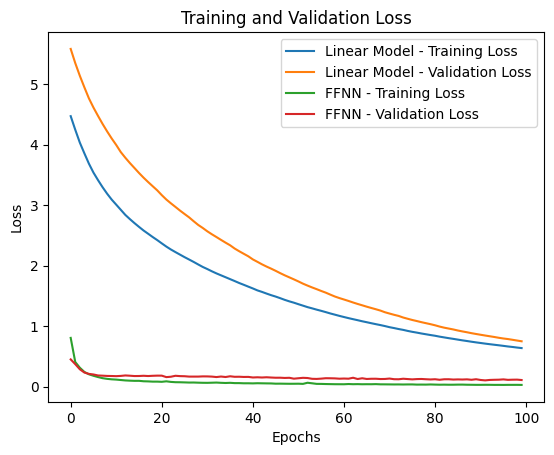

In [ ]:
import matplotlib.pyplot as plt

plt.plot(linear_history.history['loss'], label='Linear Model - Training Loss')
plt.plot(linear_history.history['val_loss'], label='Linear Model - Validation Loss')

plt.plot(ffnn_history.history['loss'], label='FFNN - Training Loss')
plt.plot(ffnn_history.history['val_loss'], label='FFNN - Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


# Bonus Assignment
* Try solving one more random dataset from kaggle/tensorflow datasets